<a href="https://colab.research.google.com/github/Demon-God-King/GoogleColab/blob/main/campaign_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## US Presidential Campaign Data Exploration
#### Dr. Bruns

In this notebook we explore campaign contributions in the 2016 US presidential election.  The data set we use covers only up until the end of October, 2015.

What are the answers to these questions?
- How many contributions did the candidates get?
- Which candidates tended to get larger contributions?  For example, did some candidates get a small number of large contributions, while other candidates got a large number of small contributions?
- Do retired people make smaller contributions?
- Does the portion of contributors who are unemployed differ much between candidates?



Instructions:
- Problems 1-15 are shown in code cells below.  Each problem begins with #@
- Insert your code below the problem description.
- Do not make changes outside the problem cells.  
- The goal is to create plots that look like the ones I provided.
- Be sure to include plot titles, labels, etc. as shown.
- Use a semicolon after the last plotting statement in a cell to suppress any text output from matplotlib.
- Restart and run all before submitting!

In [ ]:
# vF22.2

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [ ]:
sns.set()
rcParams['figure.figsize'] = 8,6
sns.set_context('talk')  
sns.set_style('whitegrid')

In [ ]:
# This is a randomly-sampled subset of the full data set.
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/campaign-ca-2016-sample.csv")

Each row of the data set gives information about a single contribution.  A contributor may make multiple contributions to multiple candidates.

Some of the key variables:
- cand_nm is the candidate name
- contbr_* variables concern the contributor (name, employer, etc.)
- contb_* variables concern the contribution (receipt_amt is the dollar value of the contribution)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cmte_id            20000 non-null  object 
 1   cand_id            20000 non-null  object 
 2   cand_nm            20000 non-null  object 
 3   contbr_nm          20000 non-null  object 
 4   contbr_city        20000 non-null  object 
 5   contbr_st          20000 non-null  object 
 6   contbr_zip         20000 non-null  object 
 7   contbr_employer    18792 non-null  object 
 8   contbr_occupation  19822 non-null  object 
 9   contb_receipt_amt  20000 non-null  float64
 10  contb_receipt_dt   20000 non-null  object 
 11  receipt_desc       406 non-null    object 
 12  memo_cd            619 non-null    object 
 13  memo_text          7809 non-null   object 
 14  form_tp            20000 non-null  object 
 15  file_num           20000 non-null  int64  
 16  tran_id            200

We will drop some of the variables for the purpose of this analysis.

In [ ]:
df.drop(columns=['cmte_id', 'cand_id', 'contbr_st', 'contbr_zip', 'receipt_desc', 
                 'memo_cd', 'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp'], inplace=True)
df.rename(columns={'cand_nm': 'candidate'}, inplace=True)

A few rows of the data.

In [ ]:
df.head(3)

,candidate,contbr_nm,contbr_city,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Clinton, Hillary Rodham","GUERIN, RACHELLE",LOS ANGELES,NaN,HOMEMAKER,2700.0,22-OCT-15
1,"Sanders, Bernard","BACA, JOAN",STUDIO CITY,CALIFORNIA STATE UNIVERSITY,LECTURER,100.0,02-MAY-15
2,"Clinton, Hillary Rodham","PIERCY, WINSTON",CATHEDRAL CTY,NaN,RETIRED,56.0,27-SEP-15


Which candidates received the most contributions?  

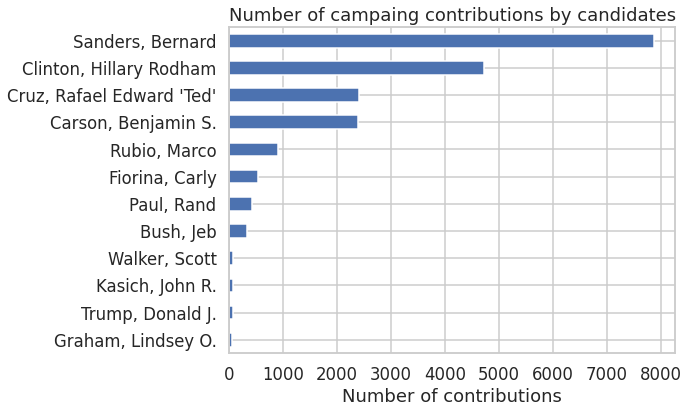

In [ ]:
#@ 1 Show the number of contributions by candidate using a horizontal barplot.  
# Show only the 12 candidates with the most contributions.
#
# Hint: use value_counts() and pandas barh() plot.  barh() is
# like bar() but horizontal.  

df['candidate'].value_counts().head(12).sort_values(ascending=True).plot.barh()
plt.title('Number of campaing contributions by candidates')
plt.xlabel('Number of contributions');

Which candidates received the most money?

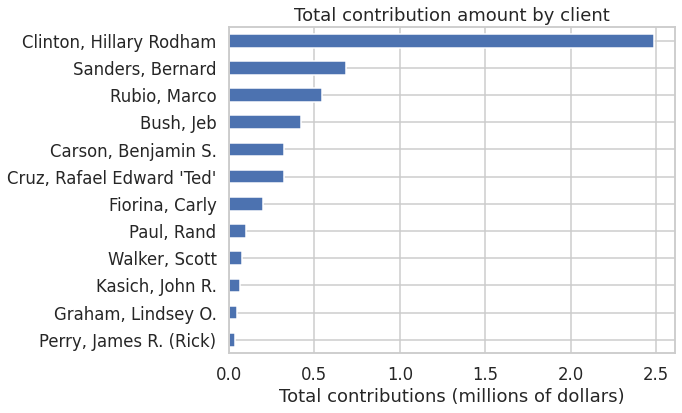

In [ ]:
#@ 2 Show the total contribution amount by candidate using a barplot.  
# Show only the 12 candidates with the largest totals.
# Give the total amount in millions of dollars.
# Do not show a y axis label.
#
# Hint: use an aggregation command.
# Hint: an axis label can be suppressed by using the empty string as the label.
#df.groupby('candidate')['contb_receipt_amt'].aggregate(['sum'])
(df.groupby('candidate')['contb_receipt_amt'].sum()/1000000).sort_values(ascending=False).head(12).plot.barh().invert_yaxis()
plt.title('Total contribution amount by client')
plt.ylabel('')
plt.xlabel('Total contributions (millions of dollars)');

What about the size of individual contributions?  Which candidates had the highest median contribution amounts?  

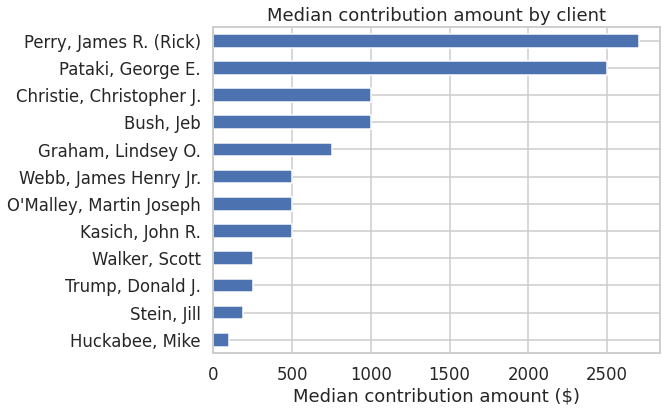

In [ ]:
#@ 3 Show the median contribution amount by candidate.
# Show only the 12 candidates with the highest median contribution.
#
# Hint: use an aggregation function.  
df.groupby('candidate')['contb_receipt_amt'].median().sort_values(ascending=False).head(12).plot.barh().invert_yaxis()
plt.title('Median contribution amount by client')
plt.ylabel('')
plt.xlabel('Median contribution amount ($)');

What is the distribution of the contribution amounts?  There are a small number of very large amounts, which make it hard to display the distribution.  Also, there are some negative contribution amounts that seem to reflect returned contributions.  Therefore, let's focus on contributions ranging from 0 to 3,000 dollars.

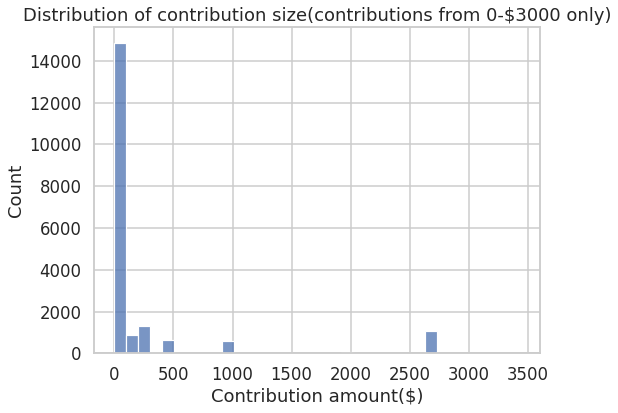

In [ ]:
#@ 4 Create a histogram showing contribution amounts.  Show
# contributions from 0 - 3000 dollars (inclusive) only.  Create 
# the histogram with Seaborn's histplot().
#
# Hint: you will want to use the 'bins' parameter of histplot().
# Remember that the value of bins can be either a single integer
# giving the number of bins, or a list or series giving the location
# of the bin edges.  Look carefully at the plot to determine the
# 'bins' value you need
sns.histplot(df['contb_receipt_amt'],bins=range(0,3500,101)).set_title('Distribution of contribution size(contributions from 0-$3000 only)')
plt.xlabel('Contribution amount($)');

It appears that most contributions are small.  Let's restrict our attention to an even smaller range of contributions to get a better idea of how small contributions are distributed.

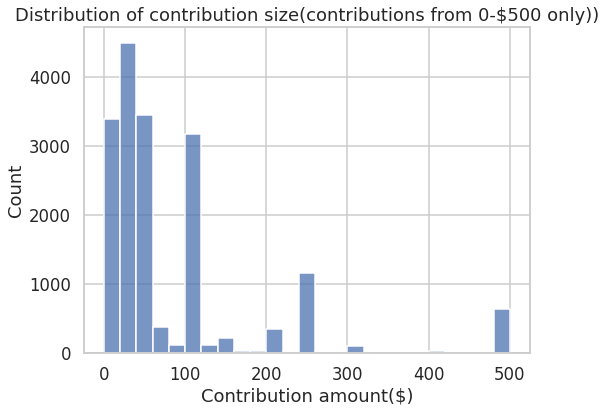

In [ ]:
#@ 5 Create a histogram showing contribution amounts.  Show
# contributions from 0 - 500 dollars only.  Create the
# histogram with Seaborn's histplot().  Use bins of width 20.
sns.histplot(df['contb_receipt_amt'],bins=range(0,501,20)).set_title('Distribution of contribution size(contributions from 0-$500 only))')
plt.xlabel('Contribution amount($)');


The appearance of a histogram is sensitive to the number of bins and bin widths.  Let's look at the contribution amounts again using a density plot.

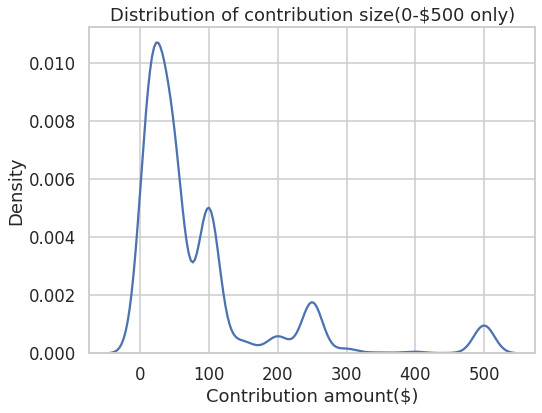

In [ ]:
#@ 6 Create a density plot (sometimes called a kernel density
# plot) showing contribution amounts.  Show contributions from 
# 0 - 500 dollars only.  Create the density plot with Seaborn's kdeplot().
#
# Hint: you may want to start by creating a series containing
# the contb_receipt_amt values from 0-500.
sns.kdeplot(pd.Series((df['contb_receipt_amt'][(df['contb_receipt_amt']<=500)  & (df['contb_receipt_amt'] >=0)]).values))
plt.title('Distribution of contribution size(0-$500 only)')
plt.xlabel('Contribution amount($)');

Let's compare the size of contributions between candidates Rubio and Cruz.  Did one of them tend to get larger-sized contributions?

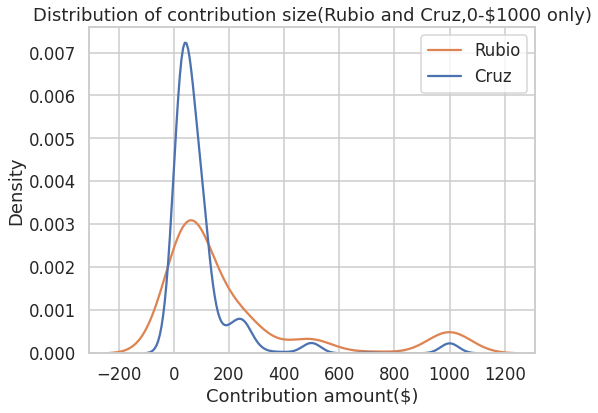

In [ ]:
#@ 7 Create a "double density plot" showing the contributions for
# Rubio and Cruz.  Show contributions in the range of 0-1000 dollars
# only.  Use a seaborn kdeplot.
#
# Hint: use the 'hue' parameter.
# Hint: first create a modified version of the data frame that contains
# only contributions for Rubio and Cruz, and only contributions from 0 to 1000 dollars.
# Hint: to customize the legend, use plt.legend().
# Hint: understand the 'common_norm' parameter of kdeplot().
a=df['candidate'][(df['candidate']=='Rubio, Marco') | (df['candidate']=="Cruz, Rafael Edward 'Ted'")]
b=(df['contb_receipt_amt'][(df['contb_receipt_amt']<=1000)  & (df['contb_receipt_amt'] >=0)])
sns.kdeplot(b,hue=a,common_norm=False)
plt.title('Distribution of contribution size(Rubio and Cruz,0-$1000 only)')
plt.legend(['Rubio', 'Cruz'])
plt.xlabel('Contribution amount($)');

Rubio and Cruz were Republican candidates.  Let's look at a pair of Democratic candidates.

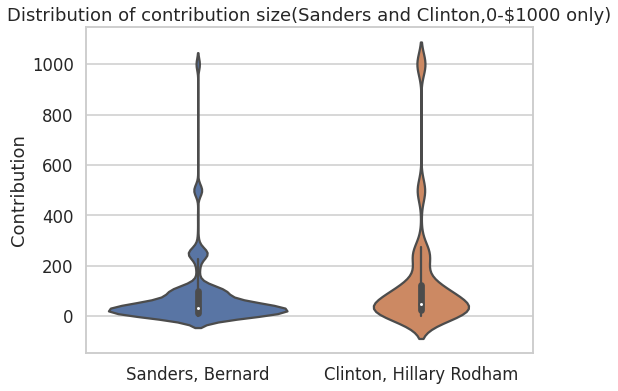

In [ ]:
#@ 8 Show the contributions of 0-1000 for Clinton and Sanders.  
# Use a seaborn violin plot.
#
# Hint: create a modified version of the data frame that contains only
# contributions for Sanders and Clinton, and only contains contributions
# from 0 to 1000 dollars. 
a=df['candidate'][(df['candidate']=='Clinton, Hillary Rodham') | (df['candidate']=="Sanders, Bernard")]
b=(df['contb_receipt_amt'][(df['contb_receipt_amt']<=1000)  & (df['contb_receipt_amt'] >=0)])
sns.violinplot(x = a,y = b,order=["Sanders, Bernard", "Clinton, Hillary Rodham"])
plt.title('Distribution of contribution size(Sanders and Clinton,0-$1000 only)')
plt.ylabel('Contribution')
plt.xlabel('');

Which occupations are associated with the greatest number of contributions?  This will be interesting, but we need to keep in mind that the occupation with the greatest number of contributions might just be the most common occupation.

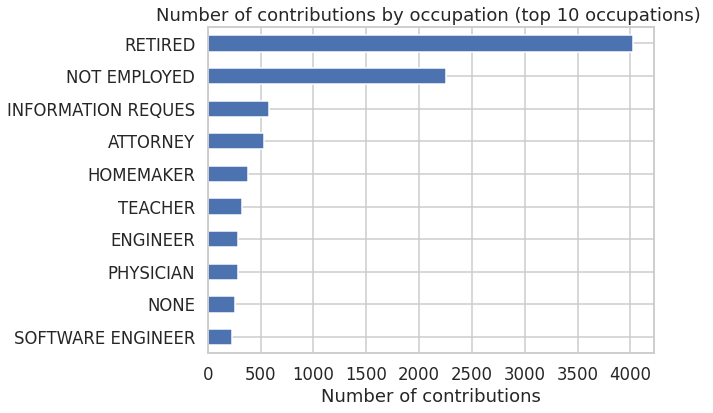

In [ ]:
#@ 9 Create a bar plot showing the total number of contributions by occupation, 
# for the 10 occupations with the largest number of contributions.  Use
# Pandas for the bar plot.  Limit the occupation names to 18 characters.
#
# Hint: to limit the occupation names to 18 characters, you can create a 
# new column 'short_occ' by using pd.Series.str.slice on the 
# 'contbr_occupation' column.
df['short_occ']=df['contbr_occupation'].str.slice(start=0,stop=18)
df['short_occ'].value_counts().head(10).sort_values(ascending=True).plot.barh()
plt.title('Number of contributions by occupation (top 10 occupations) ')
plt.xlabel('Number of contributions');

We can classify contributors as either employed, unemployed, or retired.  Among these groups, which makes the most contributions?

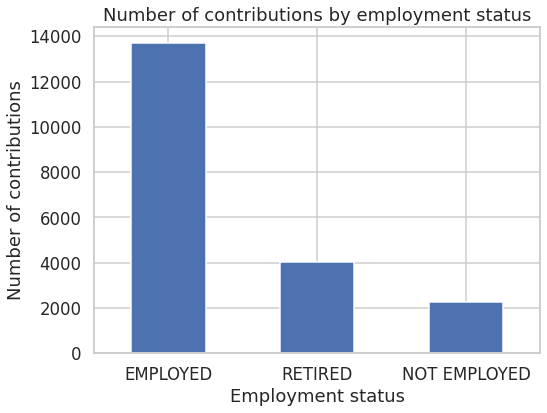

In [ ]:
#@ 10 Create a new column "contbr_employment_status" in df, derived from the 
# contbr_occupation column.  The value of contbr_employment_status should be:
# "RETIRED"       if the occupation is "RETIRED", 
# "NOT EMPLOYED"  if the occupation is "NOT EMPLOYED", 
# and "EMPLOYED"  otherwise.
# Show the number of contributions by employment status as a bar plot.
# 
# Hint: one way to create the new column of the data frame is like this:
# df['contbr_employment_status'] = df['contbr_occupation'].apply(emp_status)
# where emp_status is a function you create that takes as input a 
# contbr_occupation value and returns an employement 
# status value ('RETIRED', 'EMPLOYED', or 'UNEMPLOYED').(
# emp_status = lambda status : employment = 'RETIRED'if status == 'RETIRED' else ( print('stop')) 
# df['contbr_employment_status'] = df['contbr_occupation'].apply(emp_status)
def emp_status(status):
  if status == 'RETIRED':
    employment = 'RETIRED'
  elif status == 'NOT EMPLOYED':
    employment ='NOT EMPLOYED'
  else:
    employment = "EMPLOYED"
  return employment

df['contbr_employment_status'] = df['contbr_occupation'].apply(emp_status)
df['contbr_employment_status'].value_counts().head(10).plot.bar(rot=0)
plt.xlabel('Employment status')
plt.ylabel('Number of contributions')
plt.title('Number of contributions by employment status');

Do retired contributors tend to make smaller contributions than employed contributors?  It seems likely, but what does the data say?

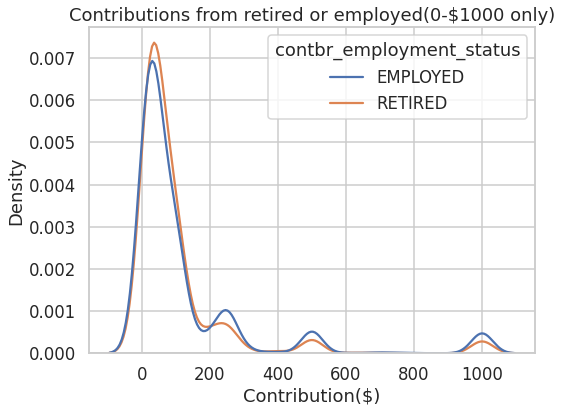

In [ ]:
#@ 11 Create a double density plot showing the distribution of
# contribution amounts from those with employment_status values
# of RETIRED and EMPLOYED.  Include only contributions of $0-1000.
# Use Seaborn's kdeplot.
#
# Hint: use the 'hue' and 'common_norm' parameters of kdeplot.
# The common_norm parameter tells kdeplot whether the area under each curve
# should be 1, or the sum of the areas under the two curves should be 1.
c=df['contbr_employment_status'][(df['contbr_employment_status']=='RETIRED') | (df['contbr_employment_status']=='EMPLOYED')]
d=df['contb_receipt_amt'][(df['contb_receipt_amt']<=1000)  & (df['contb_receipt_amt']>=0)]
sns.kdeplot(d,hue=c, common_norm=False)
plt.title('Contributions from retired or employed(0-$1000 only)')
plt.xlabel('Contribution($)');

It appears that contributions from the retired and the employed are pretty similar, although there is a significant difference when you focus on larger contributions.  Let's look more into the size of contributions from those who are employed, retired, or unemployed.  

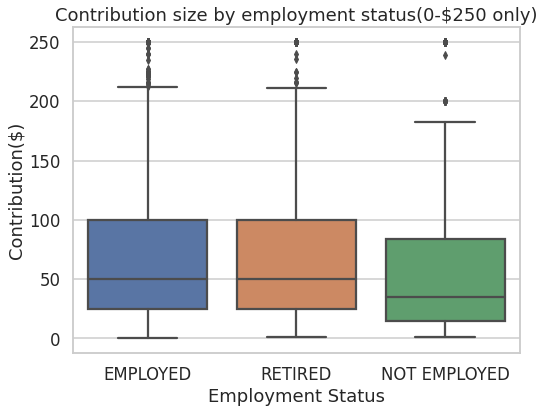

In [ ]:
#@ 12 Create a box plot of contribution amounts for each employment
# status category.  Use Seaborn to create the bar plot, and show
# only contributions in the range of $0-250.
#
# Hint: you may want to create a version of df that contains only
# contributions in the 0-250 range.
e=df['contb_receipt_amt'][(df['contb_receipt_amt']<=250)  & (df['contb_receipt_amt']>=0)]
sns.boxplot(y=e, x='contbr_employment_status', data=df)
plt.ylabel('Contribution($)')
plt.xlabel('Employment Status')
plt.title('Contribution size by employment status(0-$250 only)');

Previously we looked at the number of contributions from different occupations.  What about the size of contributions from different occupations?  Let's focus on a few occupations that contribute a lot.

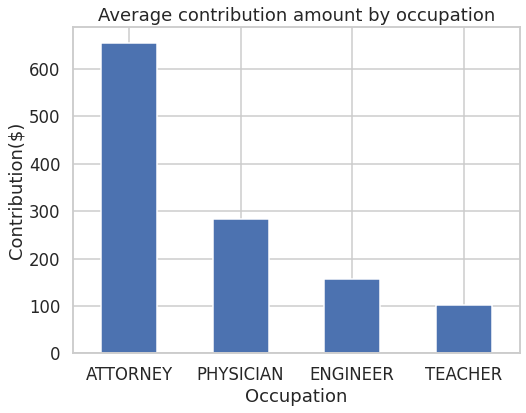

In [ ]:
#@ 13 Create a bar plot showing the average contribution amount
# for the occupations 'ATTORNEY', 'TEACHER', 'ENGINEER' and 'PHYSICIAN'.
# Include contributions of any amount.  Use Pandas to create the bar plot.
# Show the occupations in decreasing order of mean contribution amount.
#
# Hint: you may want to create a new data frame that is like df except
# that it only includes data associated with the four occupations.
# To do this, consider the Pandas method pd.Series.isin(). 
# # Hint: use the 'rot' parameter of Pandas plot.bar() to rotate the occupations.
# df['contbr_occupation''][df['contbr_occupation'].isin(['ATTORNEY', 'TEACHER', 'ENGINEER', 'PHYSICIAN'])].value_counts().plot.bar(y=df['contb_receipt_amt'].mean(),rot=0)
e=df['contbr_occupation'][df['contbr_occupation'].isin(['ATTORNEY', 'TEACHER', 'ENGINEER', 'PHYSICIAN'])]
df.groupby(e)['contb_receipt_amt'].mean().sort_values(ascending=False).plot.bar(rot=0)
plt.ylabel('Contribution($)')
plt.xlabel('Occupation')
plt.title('Average contribution amount by occupation');

Do people in different occupations tend to contribute to different candidates?  Let's look again at the same 4 occupations.

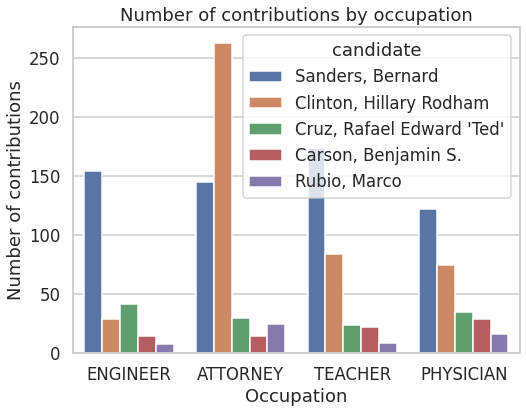

In [ ]:
#@ 14 Create a bar plot showing the number of contributions for the
# top 5 candidates according to the contributor occupation.
# By "top 5 candidates" I mean the 5 candidates with the greatest number
# of contributions.
# Consider only the occupations 'ATTORNEY', 'TEACHER', 'ENGINEER' and 'PHYSICIAN'.
# Use sns.countplot() to create the plot.
#
# Hint: Begin by creating a new data frame that is like df except that it
# it only contains rows related to the top 5 candidates and the 4 occupations.
top_cand=df['candidate'].value_counts().index[:5]
df_1 = df[df['candidate'].isin(top_cand)]
df_occ=df_1[df_1['short_occ'].isin(['ATTORNEY', 'TEACHER', 'ENGINEER', 'PHYSICIAN'])]
sns.countplot(x='short_occ',data=df_occ,hue='candidate')
plt.ylabel('Number of contributions')
plt.xlabel('Occupation')
plt.title('Number of contributions by occupation');

Do employed people and unemployed people tend to contribute to different candidates?  How about retired people?

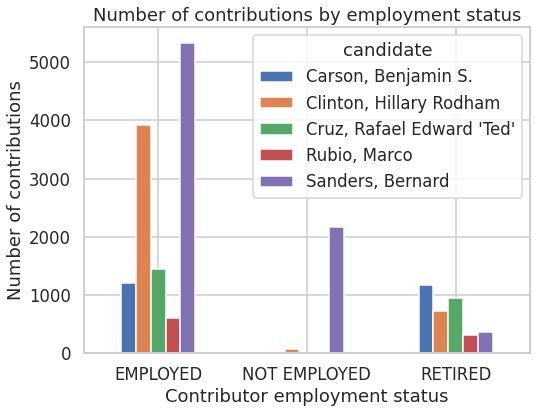

In [ ]:
#@ 15 Create a grouped bar plot showing the number of contributions
# for the top 5 candidates according to the contributor employment status.
# Use Pandas crosstab() and plot.bar() to create the plot (not Seaborn).
#
# Hint: use parameter 'rot' of plot.bar() to rotate the employment status
# values.
top_cand=df['candidate'].value_counts().index[:5]
pd.crosstab(df['contbr_employment_status'],df['candidate'][df['candidate'].isin(top_cand)]).plot.bar(rot=0)
plt.ylabel('Number of contributions')
plt.xlabel('Contributor employment status')
plt.title('Number of contributions by employment status');